## Simple demonstration of SigmaPoints

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from bayesfilt.filters import SigmaPoints
from scipy.stats import multivariate_normal

In [4]:
sp = SigmaPoints(
    dim=2,
    alpha=0.1, # spread of point around mean
    beta=2,
    kappa=1, # mostly affects weights, but also the spread
    use_cholesky=True
)

m = [0,0]
P = np.diag([1,1])
sigma_pts = sp.get_sigma_points(m=m,P=P)
for ipt, iw in zip(sigma_pts, sp.wm):
    print(np.round(iw,3), ':',ipt)

-65.667 : [0. 0.]
16.667 : [-0.17320508  0.        ]
16.667 : [ 0.         -0.17320508]
16.667 : [0.17320508 0.        ]
16.667 : [0.         0.17320508]


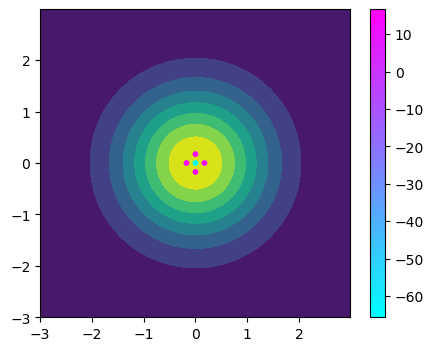

In [5]:
fig, ax = plt.subplots(figsize=(5,4))

x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(m, P)
ax.contourf(x, y, rv.pdf(pos))

sigma_pts = np.array(sigma_pts)
cm = ax.scatter(sigma_pts[:,0], sigma_pts[:,1], c=sp.wm, s=10, cmap='cool')
cbar = plt.colorbar(cm)